In [42]:
import numpy as np
import matplotlib.pyplot as plt
from math import isqrt, sqrt
import matplotlib.cm as cm
from math import sqrt, isqrt, atan, pi

In [14]:
# Быстрое решето Эратосфена
def sieve(limit):
    is_prime = np.ones(limit + 1, dtype=bool)
    is_prime[:2] = False
    for i in range(2, isqrt(limit) + 1):
        if is_prime[i]:
            is_prime[i*i::i] = False
    return np.flatnonzero(is_prime)

In [24]:
def plot_goldbach_vectors(n):
    if n % 2 != 0 or n < 4:
        print("Введите чётное число >= 4")
        return

    primes = sieve(n)
    prime_set = set(primes)

    vectors = []

    for p in primes:
        q = n - p
        if q in prime_set and p <= q:
            a = sqrt(p)
            b = sqrt(q)
            vectors.append((a, b, p, q))

    # Цвета
    cmap = plt.colormaps.get_cmap('hsv')
    
    num_vectors = len(vectors)

    # Визуализация
    plt.figure(figsize=(8, 8))
    ax = plt.gca()

    for idx, (a, b, p, q) in enumerate(vectors):
        color = cmap(idx / num_vectors)  # Распределяем равномерно по палитре

        # Вектор z = sqrt(p) + i sqrt(q)
        ax.arrow(0, 0, a, b, head_width=0.12, head_length=0.18, fc=color, ec=color, alpha=0.9, length_includes_head=True)
        ax.text(a + 0.1, b + 0.1, f"√{p}+i√{q}", fontsize=9, color=color)

        # Сопряжённый вектор z̄ = sqrt(p) - i sqrt(q)
        ax.arrow(0, 0, a, -b, head_width=0.12, head_length=0.18, fc=color, ec=color, alpha=0.9, length_includes_head=True)
        ax.text(a + 0.1, -b - 0.3, f"√{p}-i√{q}", fontsize=9, color=color)

    ax.axhline(0, color='gray', lw=1)
    ax.axvline(0, color='gray', lw=1)
    ax.set_aspect('equal')
    ax.set_title(f"Разложения n = {n} как векторы z = √p ± i√q")
    ax.set_xlabel("Re(z) = √p")
    ax.set_ylabel("Im(z) = ±√q")
    plt.grid(True)
    plt.tight_layout()
    
    # Окружность радиуса √n
    radius = sqrt(n)
    theta = np.linspace(0, 2 * np.pi, 400)
    x_circle = radius * np.cos(theta)
    y_circle = radius * np.sin(theta)
    ax.plot(x_circle, y_circle, 'k--', linewidth=1, label=f"|z| = √{n}")

    ax.legend()
    
    plt.show()

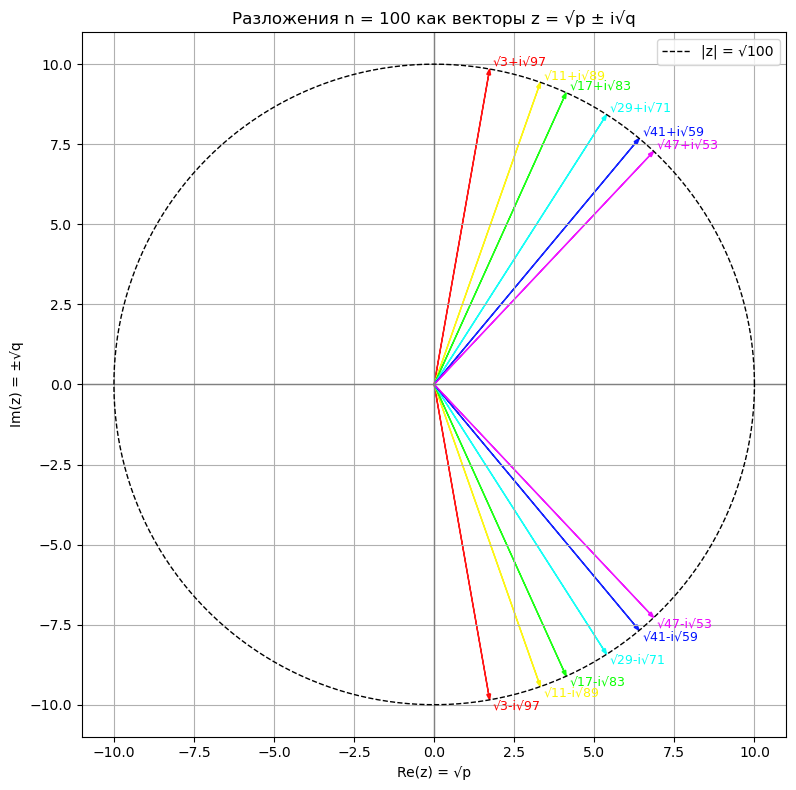

In [28]:
plot_goldbach_vectors(100)

In [35]:
# Решето Эратосфена
def sieve(limit):
    is_prime = np.ones(limit + 1, dtype=bool)
    is_prime[:2] = False
    for i in range(2, isqrt(limit) + 1):
        if is_prime[i]:
            is_prime[i*i::i] = False
    return np.flatnonzero(is_prime)

def goldbach_phases(n):
    primes = sieve(n)
    prime_set = set(primes)

    phases = []
    for p in primes:
        q = n - p
        if q in prime_set and p <= q:
            phi = atan(sqrt(q / p))
            phases.append(phi)

    # Гистограмма фаз
    plt.figure(figsize=(10, 5))
    plt.hist(phases, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f"Распределение фаз φ = arctan(√(q/p)) для разложений n={n}")
    plt.xlabel("Фаза φ (радианы)")
    plt.ylabel("Количество разложений")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

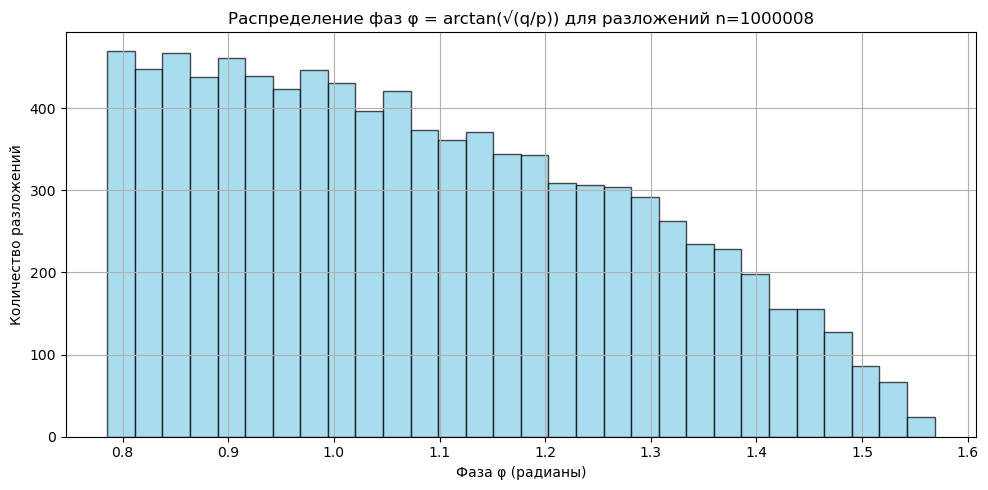

In [41]:
# Пример использования:
goldbach_phases(1000008)

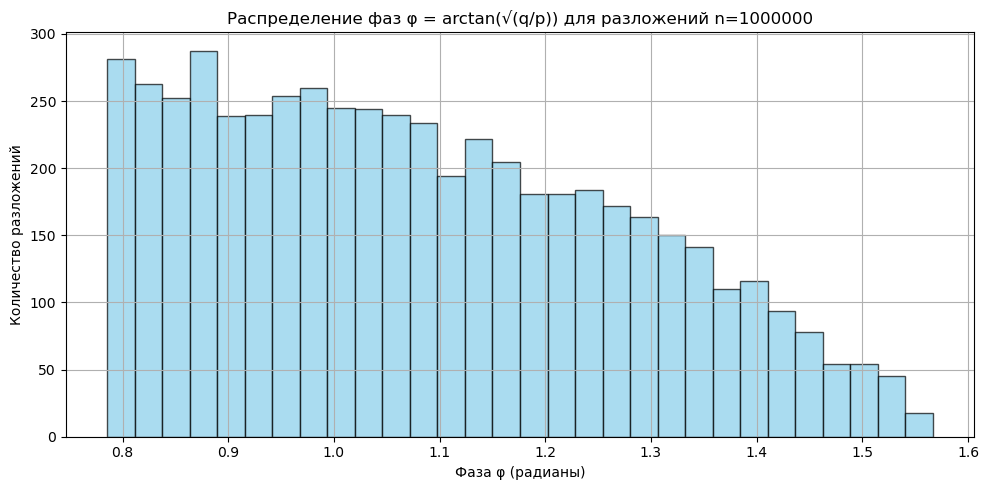

In [38]:
# Пример использования:
goldbach_phases(1000000)

In [51]:
def sieve(limit):
    is_prime = np.ones(limit + 1, dtype=bool)
    is_prime[:2] = False
    for i in range(2, isqrt(limit) + 1):
        if is_prime[i]:
            is_prime[i*i::i] = False
    return np.flatnonzero(is_prime)

def phase_variance(n):
    primes = sieve(n)
    prime_set = set(primes)
    deviations = []

    for p in primes:
        q = n - p
        if q in prime_set and p <= q:
            phi = atan(sqrt(q/p))
            deviation = (phi - pi/4)**2
            deviations.append(deviation)

    return np.sum(deviations)

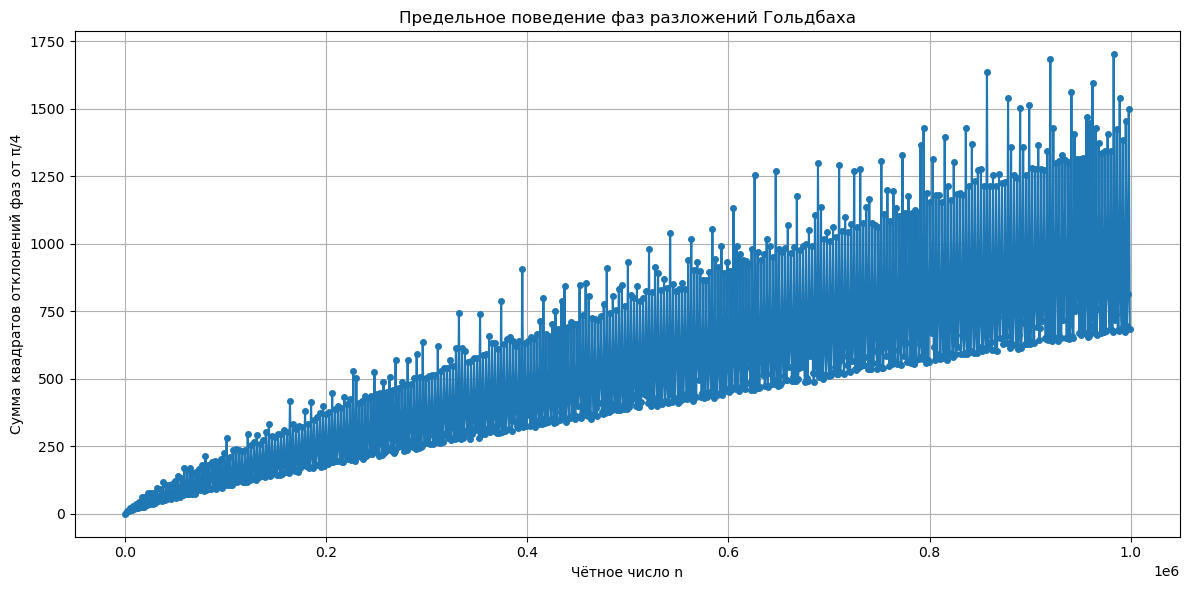

In [52]:
n_vals = range(10, 1000000, 1000)
variances = [phase_variance(n) for n in n_vals]

plt.figure(figsize=(12, 6))
plt.plot(n_vals, variances, marker='o', markersize=4)
plt.xlabel("Чётное число n")
plt.ylabel("Сумма квадратов отклонений фаз от π/4")
plt.title("Предельное поведение фаз разложений Гольдбаха")
plt.grid(True)
plt.tight_layout()
plt.show()